<a href="https://colab.research.google.com/github/Vijayaranagn/MeriSkill_Projects/blob/main/HR_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
df = pd.read_csv('/content/HR-Employee-Attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [44]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [70]:
# Renaming columns
new_columns = ['Age', 'Attrition',"Business Travel", "Daily Rate", 'Department', "Distance From Home", 'Education', "Education Field", "Employee Count", "Employee Number", 'Environment Satisfaction', 'Gender', "Hourly Rate", "Job Involvement",
               "Job Level", "Job Role", "Job Satisfaction", "Marital Status", "Monthly Income", "Monthly Rate", "Number of Companies Worked", 'Over18', "Over Time",
               'Percent Salary Hike', 'Performance Rating', 'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level', 'Total Working Years', 'Training Times Last Year',
               'Work Life Balance', 'Years At Company', 'Years In Current Role', 'Years Since Last Promotion', 'Years With Current Manager']


In [71]:
df.columns = new_columns

In [72]:
df.columns

Index(['Age', 'Attrition', 'Business Travel', 'Daily Rate', 'Department',
       'Distance From Home', 'Education', 'Education Field', 'Employee Count',
       'Employee Number', 'Environment Satisfaction', 'Gender', 'Hourly Rate',
       'Job Involvement', 'Job Level', 'Job Role', 'Job Satisfaction',
       'Marital Status', 'Monthly Income', 'Monthly Rate',
       'Number of Companies Worked', 'Over18', 'Over Time',
       'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Training Times Last Year', 'Work Life Balance',
       'Years At Company', 'Years In Current Role',
       'Years Since Last Promotion', 'Years With Current Manager'],
      dtype='object')

In [73]:
df.isnull().sum()

Age                           0
Attrition                     0
Business Travel               0
Daily Rate                    0
Department                    0
Distance From Home            0
Education                     0
Education Field               0
Employee Count                0
Employee Number               0
Environment Satisfaction      0
Gender                        0
Hourly Rate                   0
Job Involvement               0
Job Level                     0
Job Role                      0
Job Satisfaction              0
Marital Status                0
Monthly Income                0
Monthly Rate                  0
Number of Companies Worked    0
Over18                        0
Over Time                     0
Percent Salary Hike           0
Performance Rating            0
Relationship Satisfaction     0
Standard Hours                0
Stock Option Level            0
Total Working Years           0
Training Times Last Year      0
Work Life Balance             0
Years At

In [74]:
df.duplicated().sum()

0

In [75]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

# Handling NaN values
df.dropna(inplace=True)


In [76]:
df.describe()

,Age,Daily Rate,Department,Distance From Home,Education,Employee Count,Employee Number,Environment Satisfaction,Hourly Rate,Job Involvement,...,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Training Times Last Year,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Current Manager
count,1.470000e+03,1.470000e+03,1470.000000,1.470000e+03,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,-3.504377e-17,5.075305e-17,1.260544,4.350262e-17,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,1.000340e+00,1.000340e+00,0.527792,1.000340e+00,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,-2.072192e+00,-1.736576e+00,0.000000,-1.010909e+00,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.581700e-01,-8.366616e-01,1.000000,-8.875151e-01,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,-1.011589e-01,-1.204135e-03,1.000000,-2.705440e-01,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,6.653541e-01,8.788772e-01,2.000000,5.932157e-01,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2.526886e+00,1.726730e+00,2.000000,2.444129e+00,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# **EDA**

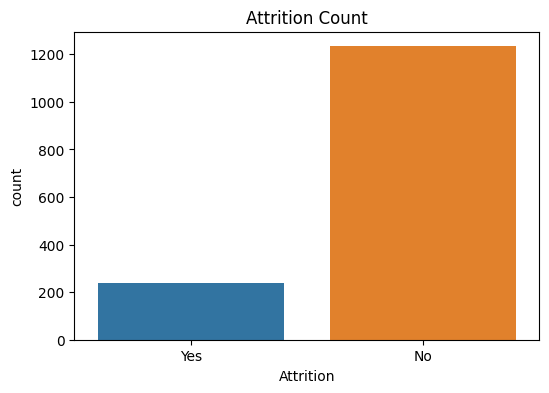

Attrition Percentage:
No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Count")
plt.show()

# Attrition percentage
attrition_percentage = (df['Attrition'].value_counts() / len(df)) * 100
print("Attrition Percentage:")
print(attrition_percentage)


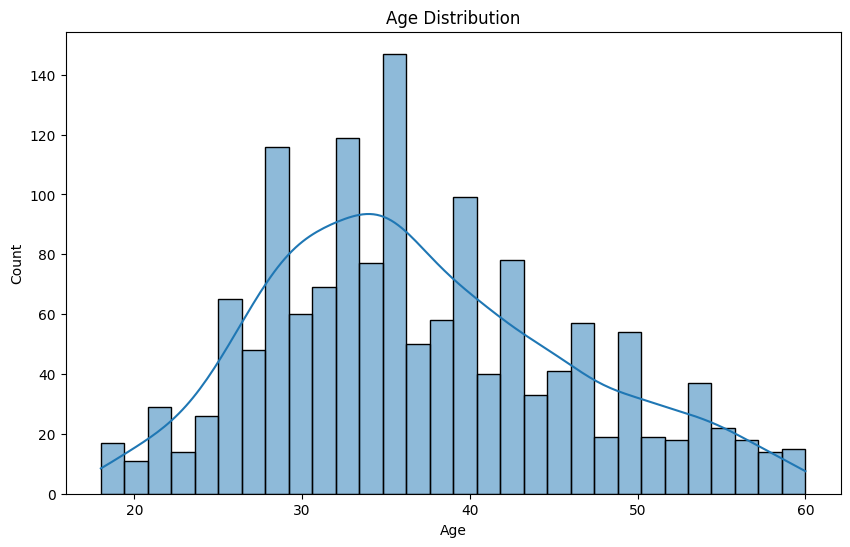

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


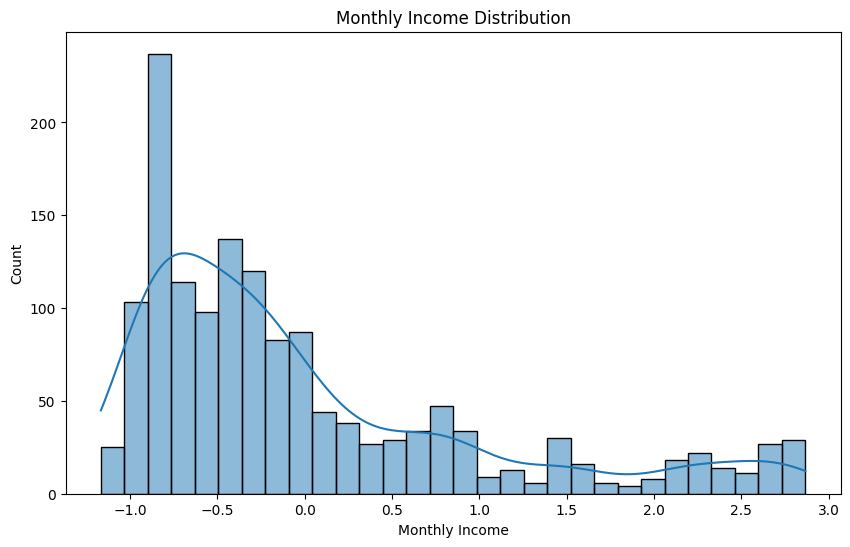

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly Income'], bins=30, kde=True)
plt.title("Monthly Income Distribution")
plt.xlabel("Monthly Income")
plt.ylabel("Count")
plt.show()

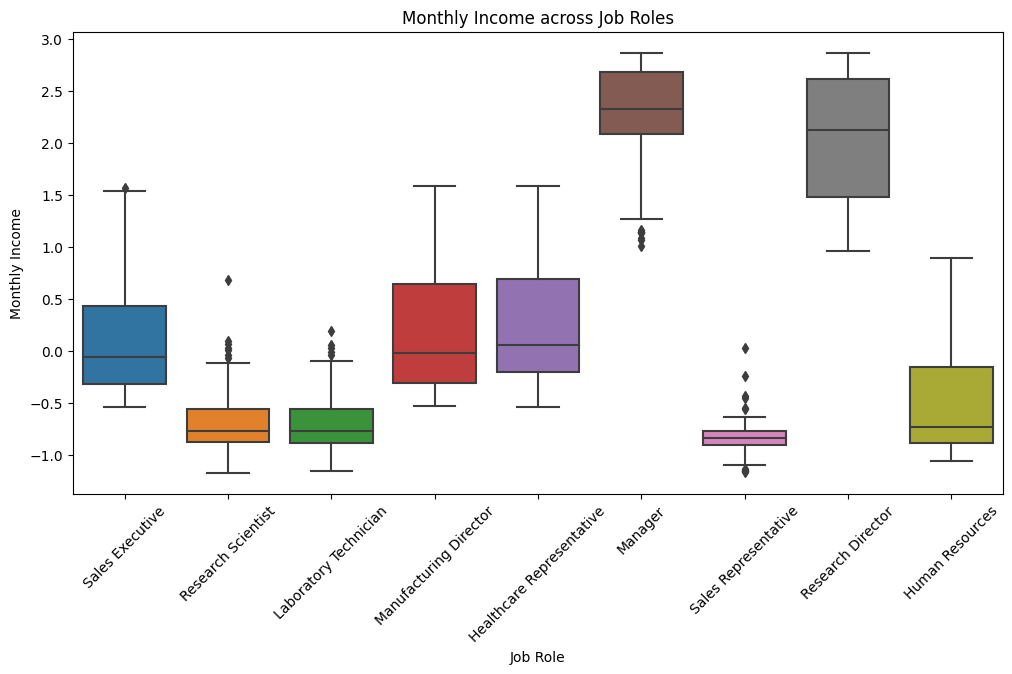

In [60]:
# Monthly Income vs. Job Role
plt.figure(figsize=(12, 6))
sns.boxplot(x='Job Role', y='Monthly Income', data=df)
plt.title("Monthly Income across Job Roles")
plt.xticks(rotation=45)
plt.show()


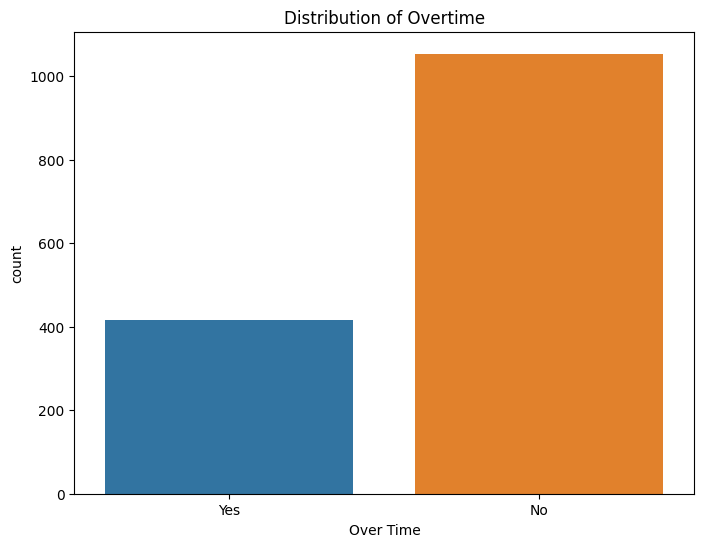

In [61]:
# Example: Overtime
plt.figure(figsize=(8, 6))
sns.countplot(x='Over Time', data=df)
plt.title("Distribution of Overtime")
plt.show()

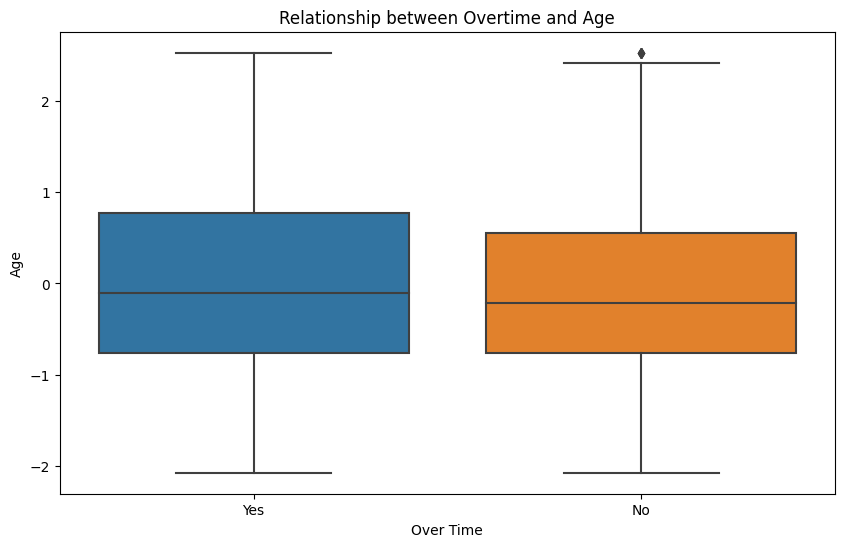

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Over Time', y='Age', data=df)
plt.title("Relationship between Overtime and Age")
plt.show()


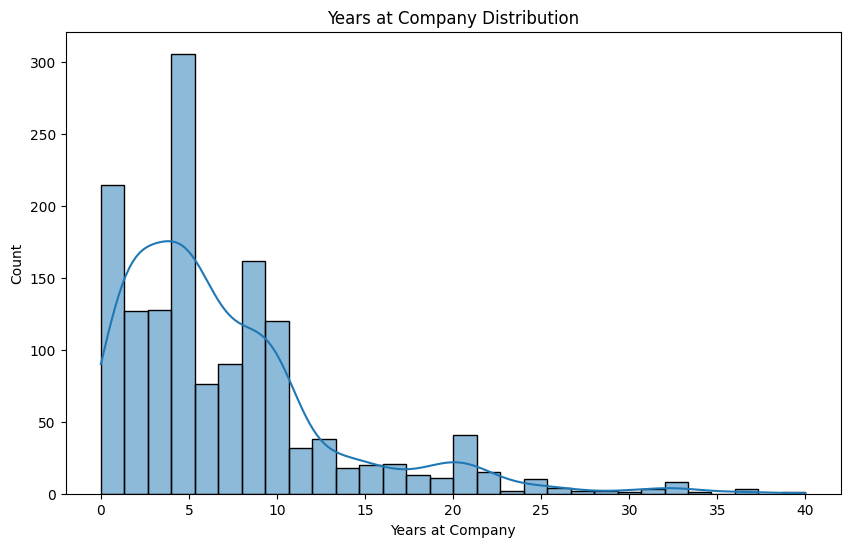

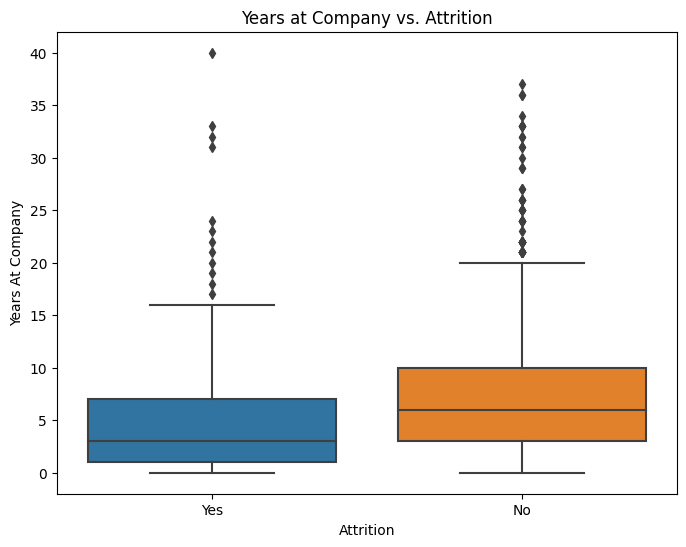

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Years At Company'], bins=30, kde=True)
plt.title("Years at Company Distribution")
plt.xlabel("Years at Company")
plt.ylabel("Count")
plt.show()

# Years at Company vs. Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='Years At Company', data=df)
plt.title("Years at Company vs. Attrition")
plt.show()


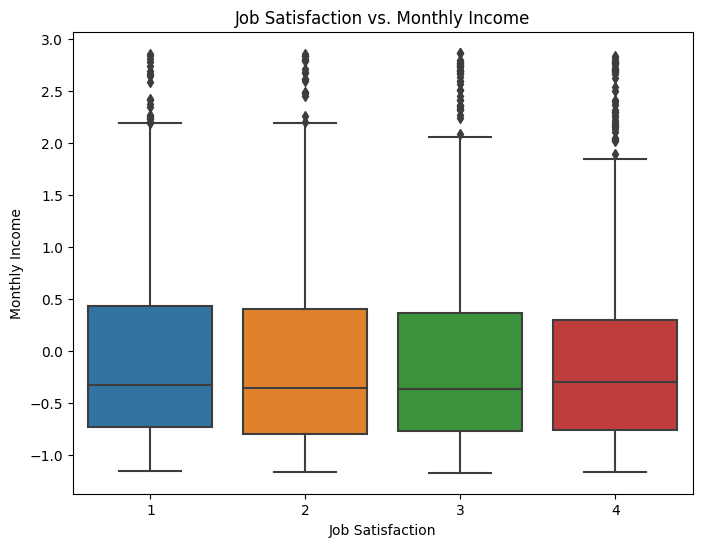

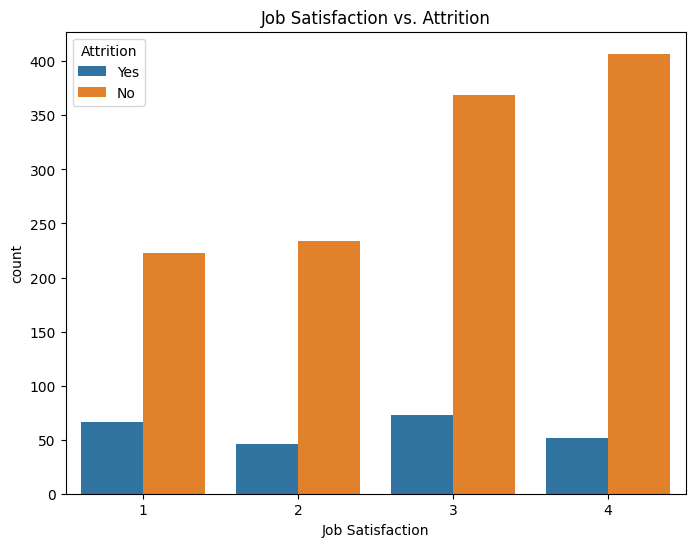

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Job Satisfaction', y='Monthly Income', data=df)
plt.title("Job Satisfaction vs. Monthly Income")
plt.show()

# Job Satisfaction vs. Attrition
plt.figure(figsize=(8, 6))
sns.countplot(x='Job Satisfaction', hue='Attrition', data=df)
plt.title("Job Satisfaction vs. Attrition")
plt.show()


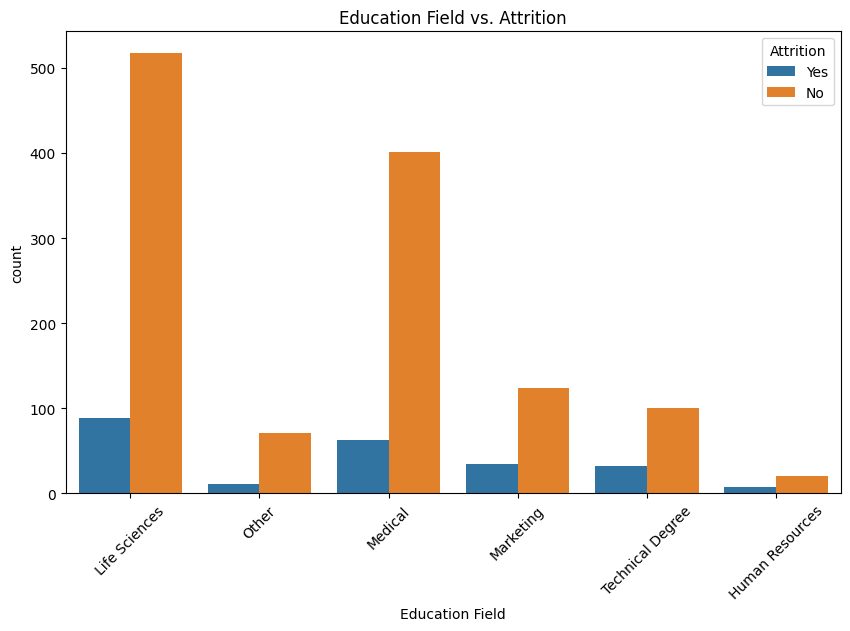

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education Field', hue='Attrition', data=df)
plt.title("Education Field vs. Attrition")
plt.xticks(rotation=45)
plt.show()


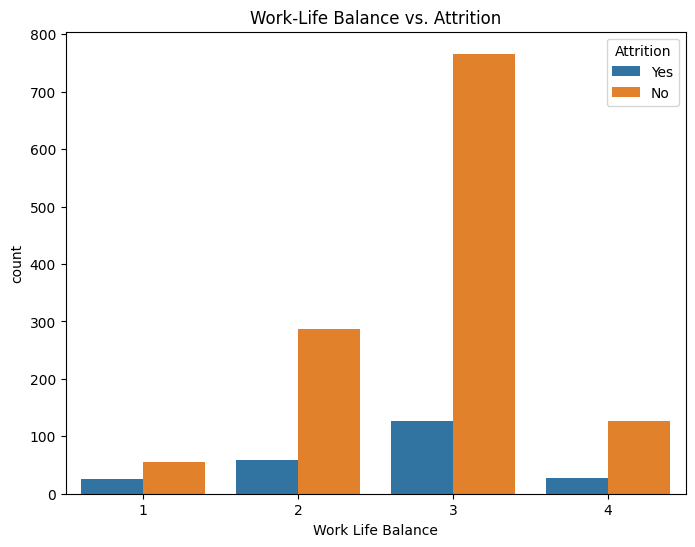

In [77]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Work Life Balance', hue='Attrition', data=df)
plt.title("Work-Life Balance vs. Attrition")
plt.show()

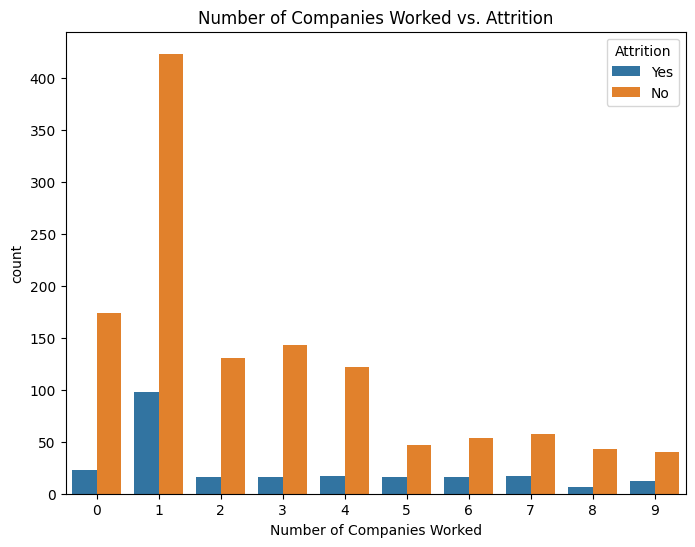

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Number of Companies Worked', hue='Attrition', data=df)
plt.title("Number of Companies Worked vs. Attrition")
plt.show()


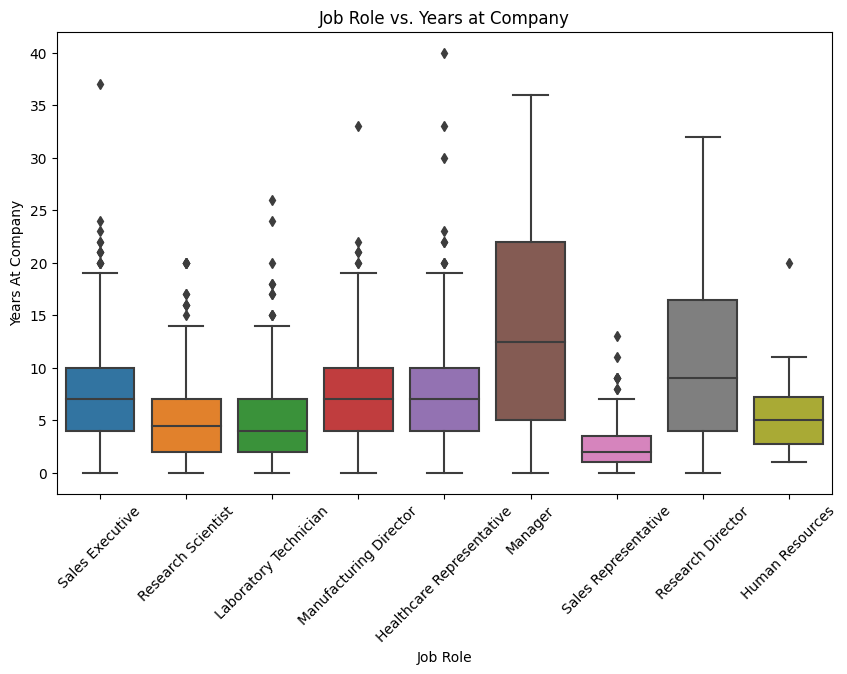

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job Role', y='Years At Company', data=df)
plt.title("Job Role vs. Years at Company")
plt.xticks(rotation=45)
plt.show()


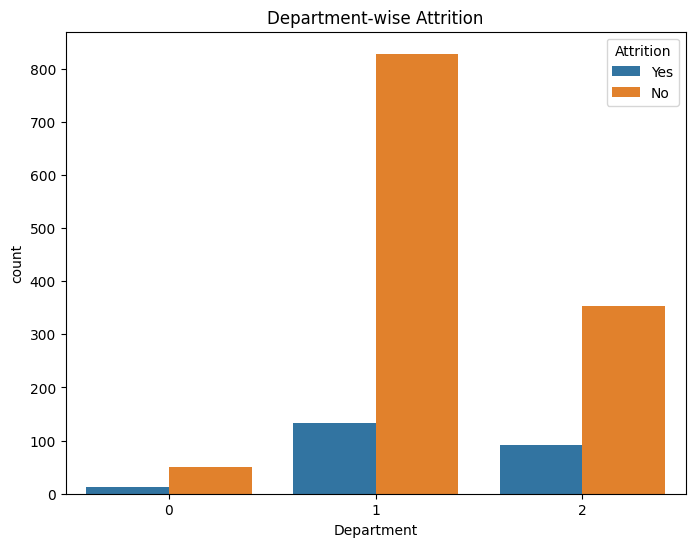

In [80]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Department-wise Attrition")
plt.show()


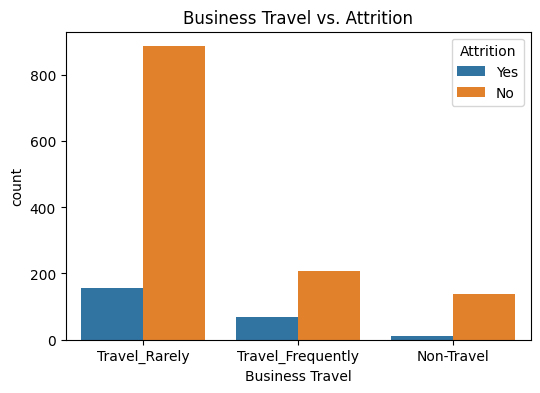

In [81]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Business Travel', hue='Attrition', data=df)
plt.title("Business Travel vs. Attrition")
plt.show()


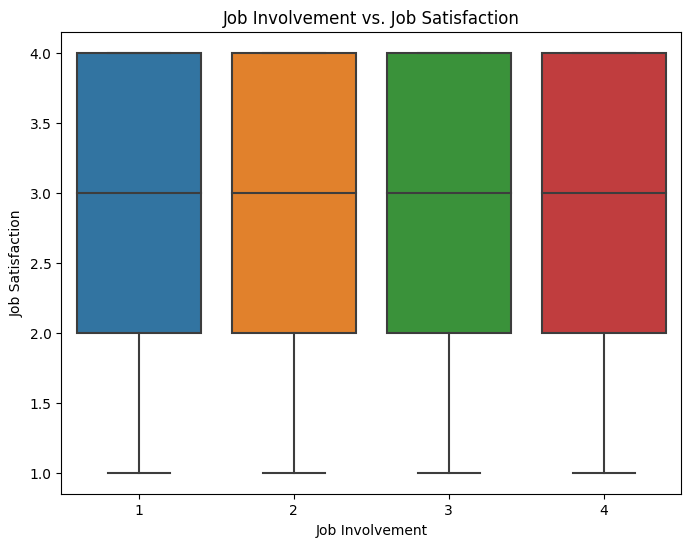

In [82]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Job Involvement', y='Job Satisfaction', data=df)
plt.title("Job Involvement vs. Job Satisfaction")
plt.show()


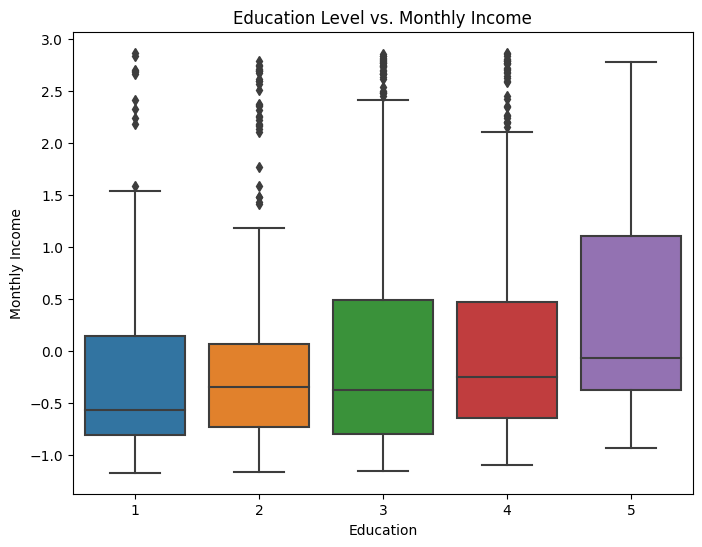

In [83]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='Monthly Income', data=df)
plt.title("Education Level vs. Monthly Income")
plt.show()


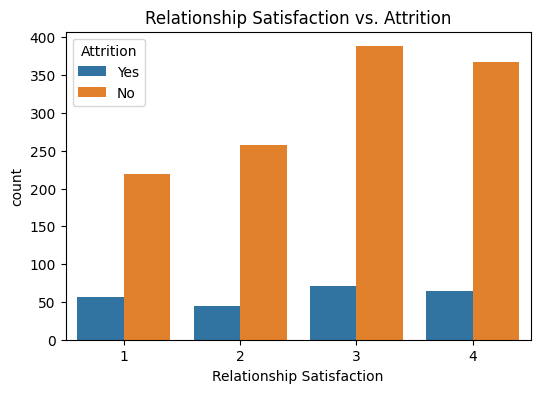

In [84]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Relationship Satisfaction', hue='Attrition', data=df)
plt.title("Relationship Satisfaction vs. Attrition")
plt.show()


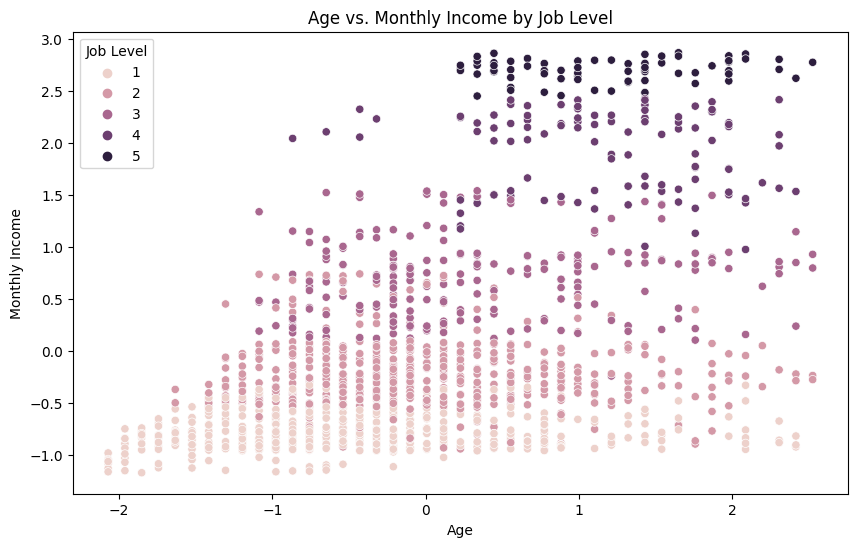

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Monthly Income', hue='Job Level', data=df)
plt.title("Age vs. Monthly Income by Job Level")
plt.show()


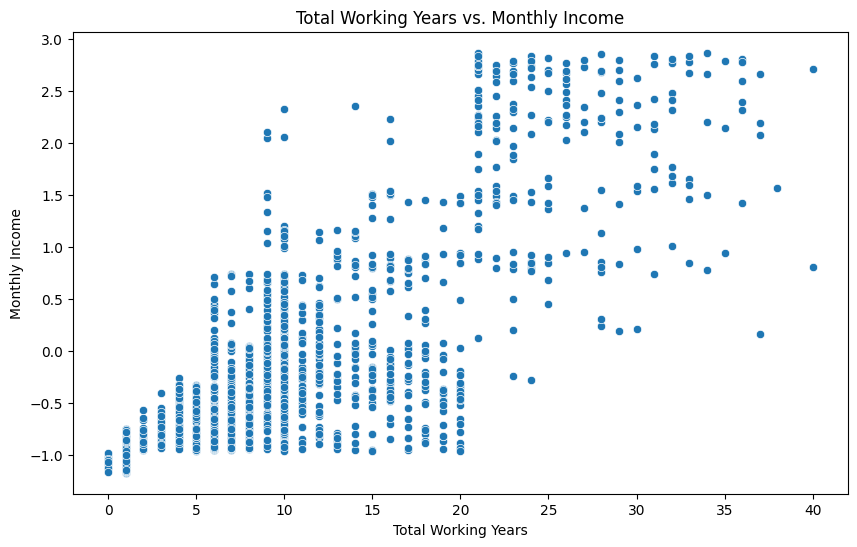

In [86]:
# Example: Total Working Years vs. MonthlyIncome
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Working Years', y='Monthly Income', data=df)
plt.title("Total Working Years vs. Monthly Income")
plt.show()

<ipython-input-11-df77b0668b56>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


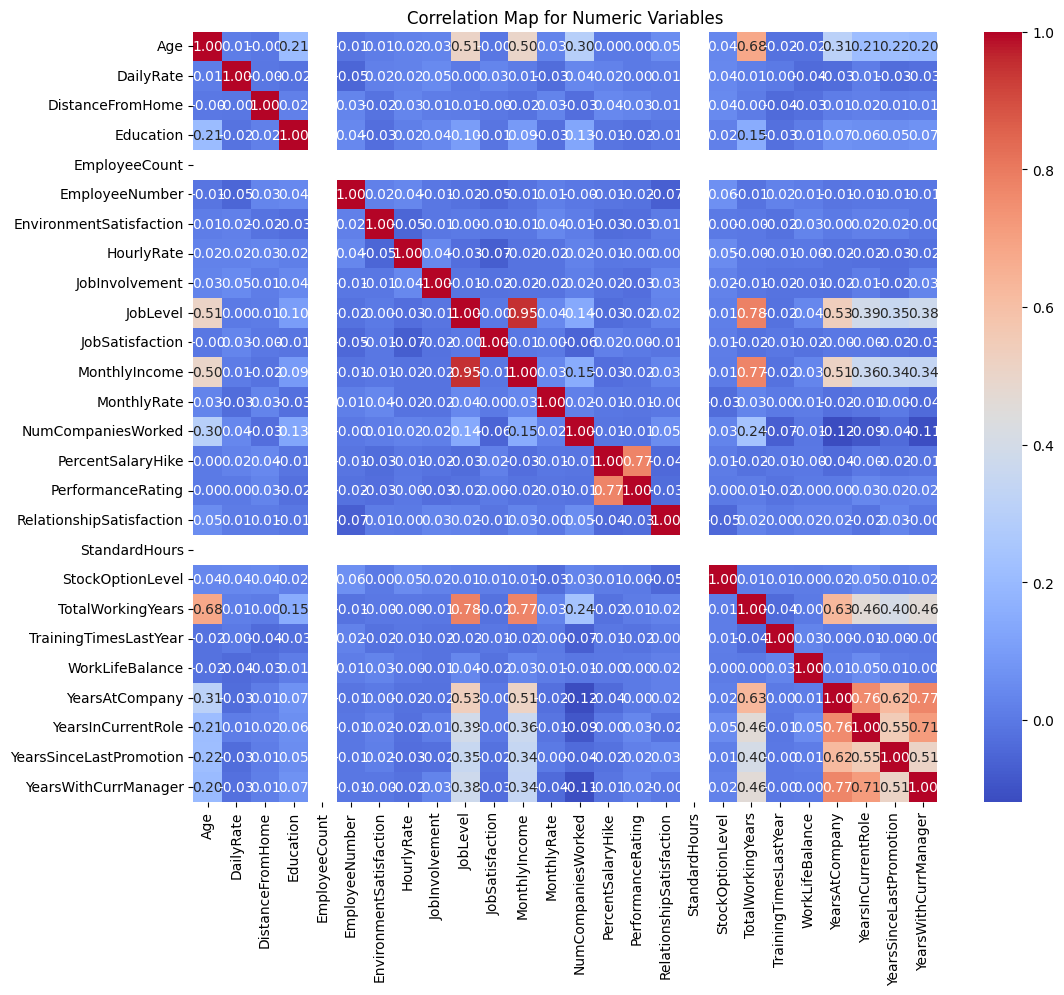

In [11]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Map for Numeric Variables")
plt.show()
